# Proyecto: Diabetics prediction
En este proyecto utilizaremos un dataset de mujeres de los 21 años en adelante, las cuales dependiendo de algunos parámetros nos podremos dar cuenta si fueron diagnosticadas con diabetes o no. Vamos a agrupar y utilizaremos K-Means que es un algoritmo no supervisado de Clustering.

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

A continuación les explico un poco del nombre de las columnas de mi dataset:

1.   Embarazos (Pregnancies)
2.   Glucosa (Glucose)
3.   Presión arterial (BloodPressure)
4.   Grosor de la piel (SkinThickness)
5.   Insulina (Insulin)
6.   Índice de masa corporal (BMI)
7.   DiabetesPedigreeFunction
8.   Edad (Age)
9.   Resultado (Outcome)













In [28]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.2.1)


In [29]:
#Librerias necesarias para correr el codigo.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.cluster import KElbowVisualizer

## Preprosesamiento



In [30]:
#Leemos el archivo donde vienen nuestros datos.
df = pd.read_csv('/content/diabetes2.csv')

In [31]:
#Dimensiones de nuestros datos
df.shape

(768, 9)

In [32]:
#Imprimimos el encabezado de nuestro dataset.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


A continuación a partir de un mapa de calor nos pudimos dar cuenta que nuestro dataset no tienes datos nulos.

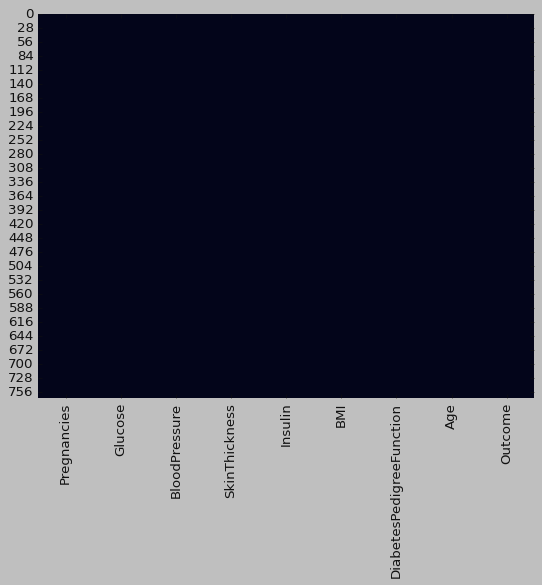

In [33]:
#Creamos un mapa de calor para asegurarnos que no existen datos nulos.
sns.heatmap(df.isnull(), cbar=False)

Ahora nuestro trabajo es elegir con que columnas trabajaremos para que nuestro trabajo sea más preciso y eficiente.

In [34]:
#Mostramos el nombre de nuestras columnas y el tipo de datos que son.
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

La diabetes es una enfermedad en la que los niveles de glucosa (azúcar) de la sangre están muy altos. La glucosa proviene de los alimentos que consume. La insulina es una hormona que ayuda a que la glucosa entre a las células para suministrarles energía. En la diabetes tipo 1, el cuerpo no produce insulina.

Decidimos trabajar con una matriz de correlación ya que nuestro objetivo es ahora determinar la relación entre cada par de estas columnas. Lo haremos trazando la matriz de correlación. Para ver con que columnas podemos trabajar mejor.

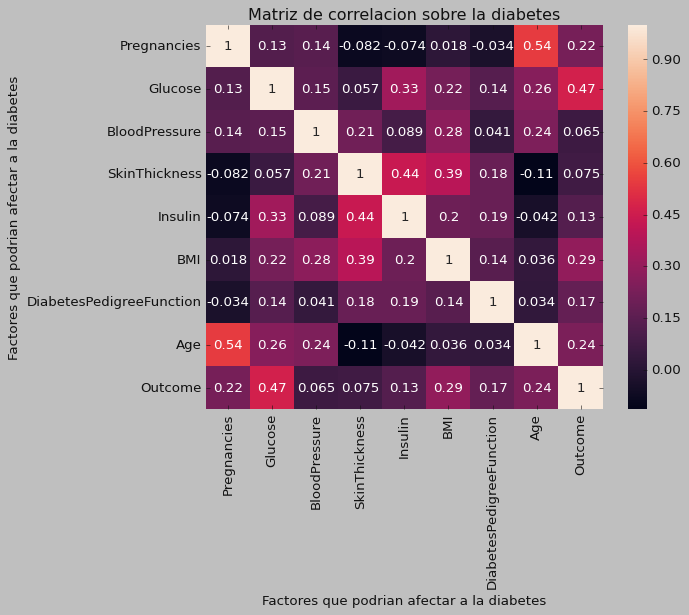

<Figure size 640x480 with 0 Axes>

In [35]:
#Creamos una matriz de correlacion para ver que columnas nos conviene mas elegir.
matriz = df.corr()
sns.heatmap(matriz, annot = True)

plt.title("Matriz de correlacion sobre la diabetes")

plt.xlabel("Factores que podrian afectar a la diabetes")

plt.ylabel("Factores que podrian afectar a la diabetes")

plt.figure()
plt.show()

Después de haber observado la matriz nos pudimos dar cuenta que la mejor correlación era en los factores que se interceptaban los factores y los después mencionados eran los más frecuentes, por lo tanto trabajaremos con las siguientes columnas: Pregnancies, Glucose, Age,Insulin, junto con Outcome. Y si lo pensamos por obvias razones son los factores que más son frecuentes en personas que tienen diabetes.

In [36]:
#Elegimos las columnas con las que trabajaremos y mostramos el encabezado de ellos.
dia = df[["Pregnancies","Glucose","Age",'Insulin',"Outcome"]]
dia.head()

,Pregnancies,Glucose,Age,Insulin,Outcome
0,6,148,50,0,1
1,1,85,31,0,0
2,8,183,32,0,1
3,1,89,21,94,0
4,0,137,33,168,1


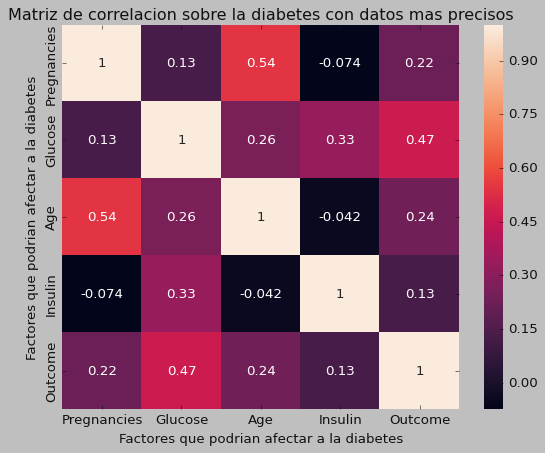

<Figure size 640x480 with 0 Axes>

In [37]:
#Creamos de nuevo nuestra matriz pero ahora solo para las columnas con las que trabajaremos.
matrizBuena = dia.corr()
sns.heatmap(matrizBuena, annot = True)
plt.title("Matriz de correlacion sobre la diabetes con datos mas precisos")

plt.xlabel("Factores que podrian afectar a la diabetes")

plt.ylabel("Factores que podrian afectar a la diabetes")
plt.figure()
plt.show()

## Visualización de los datos

Creamos una pequeña visualización de nuestros datos para ver como se comportan.

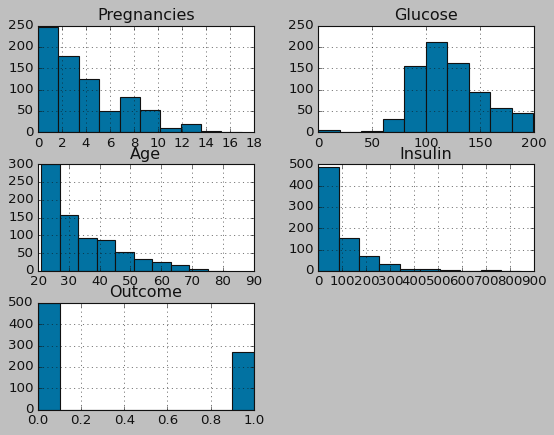

In [38]:
#Visualizamos nuestros datos con en histograma.
dia.hist()
plt.show()

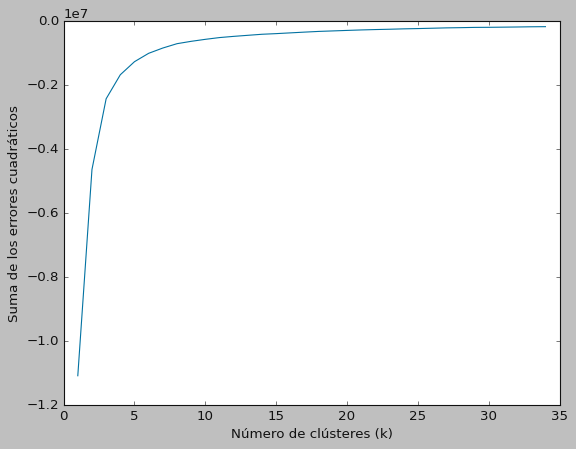

In [39]:
#%% Metodo del codo para determinar valor óptimo de k.
iteraciones = range(1, 35) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in iteraciones]
score = [kmeans[i].fit(dia).score(dia) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(iteraciones,score)

Con el metodo del codo antes realizado pudimos darnos cuenta que un valor ideal de **k**, es **k = 6**. Bien sabemos que no existe un valor exacto de **k**, pero mas adelante en la interpretación de nuestros clusters podremos darnos cuenta si elegimos un buen **k**.

En los datos anteriores podemos traducirlos que son las coordenadas de los 6 clusters.

In [40]:
#Realizamos el algoritmo K-means con nuestros datos
cluster = KMeans(n_clusters=6,init='random',max_iter=250).fit(dia.drop('Outcome',axis=1))
cluster

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=250, n_clusters=6,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

Con esto podemos imprimir nuestros resultados, los cuales son todos los registros que necesitamos con todas las columnas necesarias para obtener el mejor resultado.

A continuación se muestra en que cluster quedo cada fila.

In [41]:
#Aqui podemos darnos cuenta en que cluster quedo cada uno de nuestras filas.
resultados = list(cluster.labels_)
dia = dia.assign(todosClusters = resultados)
dia.head()

,Pregnancies,Glucose,Age,Insulin,Outcome,todosClusters
0,6,148,50,0,1,2
1,1,85,31,0,0,4
2,8,183,32,0,1,2
3,1,89,21,94,0,3
4,0,137,33,168,1,1


## Explicación de cada uno de nuestros clusters.

A continuación podemos ver los datos que nos arrojo el algoritmo k-means antes realizado.

En el primer cluster pudimos darnos cuenta que la probabilidad de que les diera diabetes es **50%** a las persona que en promedio tienen:


1.   Pregnancies = 4.159091
1.   Glucose = 150.386364
1.   Age = 33.863636
2.   Insulin = 302.772727
2.   Outcome = 0.500000

In [42]:
#Resultados cluster 1
cluster1 = dia[dia['todosClusters'] == 0]
cluster1.mean()

Pregnancies        4.159091
Glucose          150.386364
Age               33.863636
Insulin          302.772727
Outcome            0.500000
todosClusters      0.000000
dtype: float64

En el segundo cluster pudimos darnos cuenta que la probabilidad de que les diera diabetes es **50%** a las persona que en promedio tienen:


1.   Pregnancies = 3.800000
1.   Glucose = 134.264286
1.   Age = 33.292857
2.   Insulin = 167.935714
2.   Outcome = 0.500000

In [43]:
#Resultados cluster 2
cluster2 = dia[dia['todosClusters'] == 1]
cluster2.mean()

Pregnancies        3.800000
Glucose          134.264286
Age               33.292857
Insulin          167.935714
Outcome            0.500000
todosClusters      1.000000
dtype: float64

En el tercer cluster pudimos darnos cuenta que la probabilidad de que les diera diabetes es **60%** a las persona que en promedio tienen:


1.   Pregnancies = 4.727273
1.   Glucose = 152.489510
1.   Age = 39.916084
2.   Insulin = 0.944056
2.   Outcome = 0.608392

In [44]:
#Resultados cluster 3
cluster3 = dia[dia['todosClusters'] == 2]
cluster3.mean()

Pregnancies        4.727273
Glucose          152.489510
Age               39.916084
Insulin            0.944056
Outcome            0.608392
todosClusters      2.000000
dtype: float64

En el cuarto cluster pudimos darnos cuenta que la probabilidad de que les diera diabetes es **13%** a las persona que en promedio tienen:


1.   Pregnancies = 2.800000
1.   Glucose = 104.047059
1.   Age = 28.247059
2.   Insulin = 81.682353
2.   Outcome = 0.135294

In [45]:
#Resultados cluster 4
cluster4 = dia[dia['todosClusters'] == 3]
cluster4.mean()

Pregnancies        2.800000
Glucose          104.047059
Age               28.247059
Insulin           81.682353
Outcome            0.135294
todosClusters      3.000000
dtype: float64

En el quinto cluster pudimos darnos cuenta que la probabilidad de que les diera diabetes es **21%** a las persona que en promedio tienen:


1.   Pregnancies = 4.071146
1.   Glucose = 98.632411
1.   Age = 32.592885
2.   Insulin = 2.185771
2.   Outcome = 0.213439

In [46]:
#Resultados cluster 5
cluster5 = dia[dia['todosClusters'] == 4]
cluster5.mean()

Pregnancies       4.071146
Glucose          98.632411
Age              32.592885
Insulin           2.185771
Outcome           0.213439
todosClusters     4.000000
dtype: float64

En el sexto cluster pudimos darnos cuenta que la probabilidad de que les diera diabetes es **66%** a las persona que en promedio tienen:


1.   Pregnancies = 3.111111
1.   Glucose = 165.833333
1.   Age = 34.555556
2.   Insulin = 548.833333
2.   Outcome = 0.666667

In [47]:
#Resultados cluster 6
cluster6 = dia[dia['todosClusters'] == 5]
cluster6.mean()

Pregnancies        3.111111
Glucose          165.833333
Age               34.555556
Insulin          548.833333
Outcome            0.666667
todosClusters      5.000000
dtype: float64

Cada que volvemos a correr el codigo podemos darnos cuenta 

En esta grafica pudimos darnos cuenta de la clasificación de los clusters por colores y se hizo en 3 dimensiones.

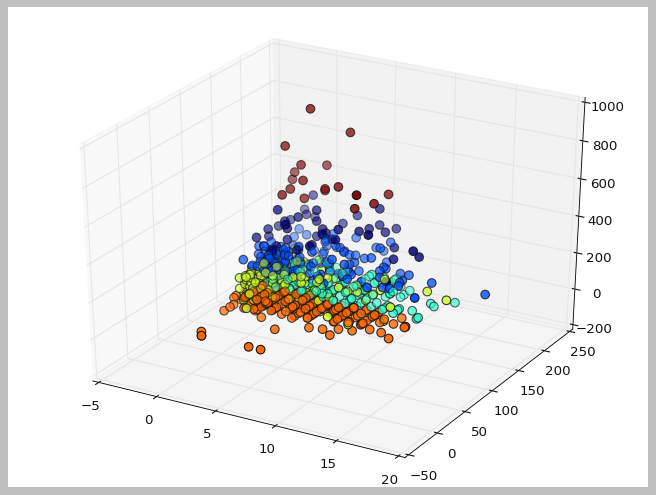

In [48]:
#Realizamos la visualizacion en 3D de nuestros clusters y podemos notar los pequeños grupos.
X = np.array(dia[["Pregnancies","Glucose",'Insulin']])

labels = np.array(dia['todosClusters'])
plt.style.use('classic')

y = np.array(dia['Outcome'])

fig = plt.figure()
ax=Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels,s=60)

Por ultimo, como podemos ver en los pequeños grupos(clusters), los cuales cada uno se refiere a un grupo que tiene características muy similares, de esto se trata lo que hace k-mean, a partir de parámetros que ya tenemos, basándose en características.

En algunos casos es de suma importancia tomar algunas columnas y no todas, ya que en algunos casos los datasets pueden tener columnas que sean "basura" y nos puedan perjudicar si las usamos. En este caso yo utilice la matriz de correlación para solo elegir de las mas importantes y por nuestra gráfica pudimos notar que hicimos una buena elección, tanto de el, como de las columnas seleccionadas.

En conclusión, me gustaría hacer mención que no solo el dejar de producir insulina provoca diabetes, sino el producir en exceso también lo provoca:

Al principio, la resistencia a la insulina hace que el cuerpo produzca insulina adicional para compensar la insulina ineficaz. El exceso de insulina en el torrente sanguíneo puede causar hipoglucemia. Pero la resistencia la insulina tiende a empeorar con el tiempo hasta que finalmente disminuye la capacidad del cuerpo para producir insulina. A medida que los niveles de insulina bajan, los niveles de azúcar suben. Si los niveles no vuelven a la normalidad, la persona puede desarrollar diabetes tipo 2.

[Vean este sitio, puede ser de su interes.](https://medlineplus.gov/spanish/pruebas-de-laboratorio/insulina-en-la-sangre/#:~:text=Al%20principio%2C%20la%20resistencia%20a,torrente%20sangu%C3%ADneo%20puede%20causar%20hipoglucemia.)